In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

file_path = 'routes.csv'
routes_df = pd.read_csv(file_path)

In [2]:
# Общая информация
print(f"Размер датасета: {routes_df.shape}")
print("\nПервые 5 строк:")
display(routes_df.head())

Размер датасета: (12193, 11)

Первые 5 строк:


,ID маршрута,Дата отправки,Расстояние (км),Средняя скорость (км/ч),Загруженность дорог,Погодные условия,Тип транспорта,Вес груза (кг),Время суток,День недели,Фактическое время в пути (часы)
0,RTE69196,2019-01-01,1946,75,Средняя,Снег,Прицеп,5152.0,День,Вторник,29
1,RT66389,2019-01-01,1106,67,Средняя,Снег,Фургон,8122.0,Вечер,Вторник,14
2,RT95245,2019-01-01,2059,41,Высокая,Снег,Прицеп,13803.0,Утро,Вторник,41
3,RTE53292,2019-01-02,515,72,Средняя,Ясно,Фургон,2156.0,Утро,Среда,7
4,RTE10603,2019-01-02,700,78,Средняя,NaN,Прицеп,15181.0,Утро,Среда,12


In [3]:
print("\nDataset Information:")
routes_df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12193 entries, 0 to 12192
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID маршрута                      12193 non-null  object 
 1   Дата отправки                    12193 non-null  object 
 2   Расстояние (км)                  12193 non-null  int64  
 3   Средняя скорость (км/ч)          12193 non-null  int64  
 4   Загруженность дорог              12072 non-null  object 
 5   Погодные условия                 11481 non-null  object 
 6   Тип транспорта                   12072 non-null  object 
 7   Вес груза (кг)                   11591 non-null  float64
 8   Время суток                      12193 non-null  object 
 9   День недели                      12193 non-null  object 
 10  Фактическое время в пути (часы)  12193 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 1.0+ MB


In [4]:
# Описательная статистика для числовых признаков
display(routes_df.describe().round(0))

,Расстояние (км),Средняя скорость (км/ч),Вес груза (кг),Фактическое время в пути (часы)
count,12193.0,12193.0,11591.0,12193.0
mean,1005.0,63.0,15180.0,17.0
std,585.0,15.0,8637.0,11.0
min,-20.0,24.0,-351.0,0.0
25%,506.0,52.0,7702.0,8.0
50%,992.0,62.0,15230.0,16.0
75%,1489.0,73.0,22626.0,24.0
max,2536.0,125.0,30428.0,62.0


In [5]:
# Описательная статистика для строковых признаков
display(routes_df.select_dtypes(include=['object', 'category']).describe())

,ID маршрута,Дата отправки,Загруженность дорог,Погодные условия,Тип транспорта,Время суток,День недели
count,12193,12193,12072,11481,12072,12193,12193
unique,11916,2463,3,5,4,4,7
top,RTE48247,2019-01-19,Средняя,Ясно,Грузовик,Ночь,Воскресенье
freq,3,15,5480,5737,3997,3099,1772


In [6]:
# Проверка на пустые данные
missing_counts = routes_df.isnull().sum()
missing_percent = (missing_counts / len(routes_df)) * 100
missing_data = pd.DataFrame({'Количество пропусков': missing_counts, 'Процент пропусков': missing_percent})
display(missing_data)

,Количество пропусков,Процент пропусков
ID маршрута,0,0.000000
Дата отправки,0,0.000000
Расстояние (км),0,0.000000
Средняя скорость (км/ч),0,0.000000
Загруженность дорог,121,0.992373
Погодные условия,712,5.839416
Тип транспорта,121,0.992373
Вес груза (кг),602,4.937259
Время суток,0,0.000000
День недели,0,0.000000


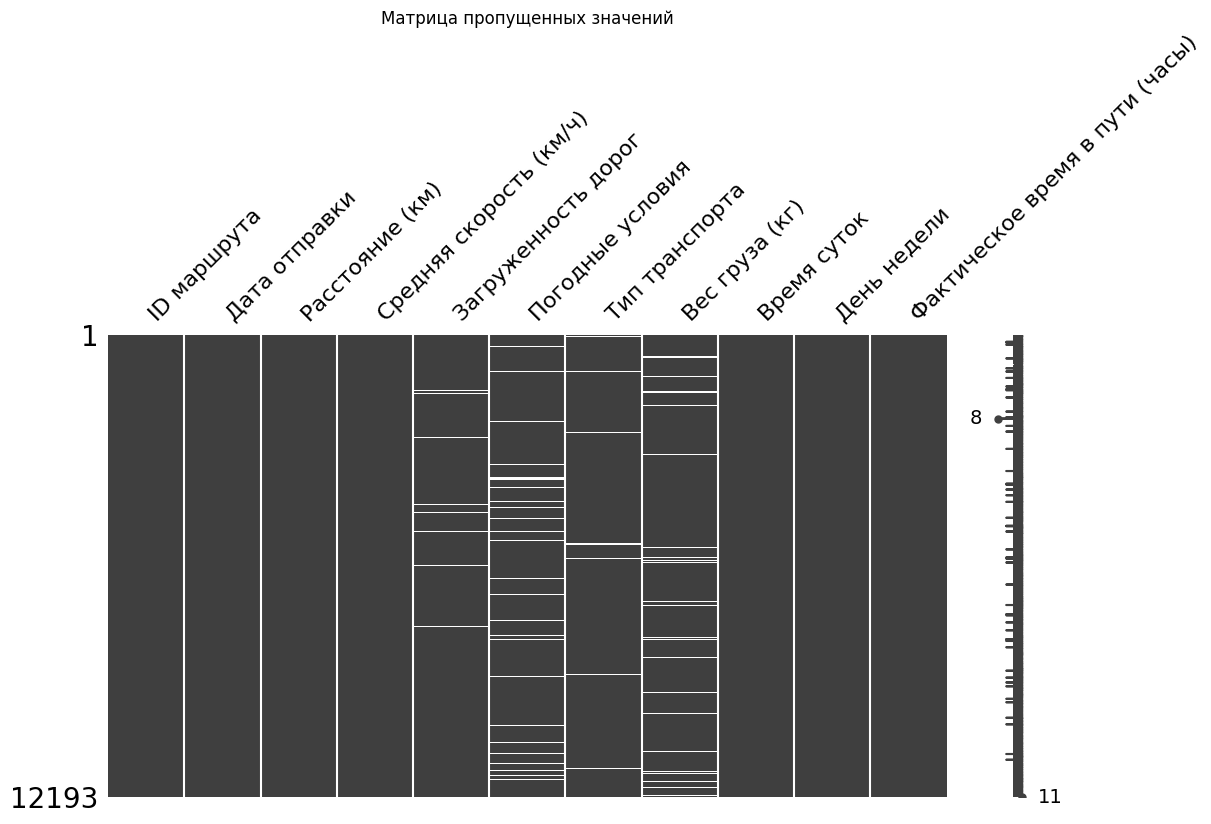

In [7]:
# Визуализация пропущенных значений
msno.matrix(routes_df, figsize=(12,6))
plt.title('Матрица пропущенных значений')
plt.show()

In [8]:
# Проверка на дубликаты
duplicate_count = routes_df.duplicated().sum()
print(f"Количество дублированных строк: {duplicate_count}")

Количество дублированных строк: 0


In [19]:
print("\nUnique Values per Column")
for col in routes_df.columns:
    print(f"{col}: {routes_df[col].nunique()} unique values")


Unique Values per Column
ID маршрута: 11916 unique values
Дата отправки: 2463 unique values
Расстояние (км): 2225 unique values
Средняя скорость (км/ч): 95 unique values
Загруженность дорог: 3 unique values
Погодные условия: 5 unique values
Тип транспорта: 4 unique values
Вес груза (кг): 9632 unique values
Время суток: 4 unique values
День недели: 7 unique values
Фактическое время в пути (часы): 63 unique values


In [10]:
# Анализ типов данных и разделение признаков
numeric_cols = routes_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = routes_df.select_dtypes(include=['object']).columns.tolist()

print("Числовые признаки:", numeric_cols)
print("Строковые признаки:", categorical_cols)

Числовые признаки: ['Расстояние (км)', 'Средняя скорость (км/ч)', 'Вес груза (кг)', 'Фактическое время в пути (часы)']
Строковые признаки: ['ID маршрута', 'Дата отправки', 'Загруженность дорог', 'Погодные условия', 'Тип транспорта', 'Время суток', 'День недели']


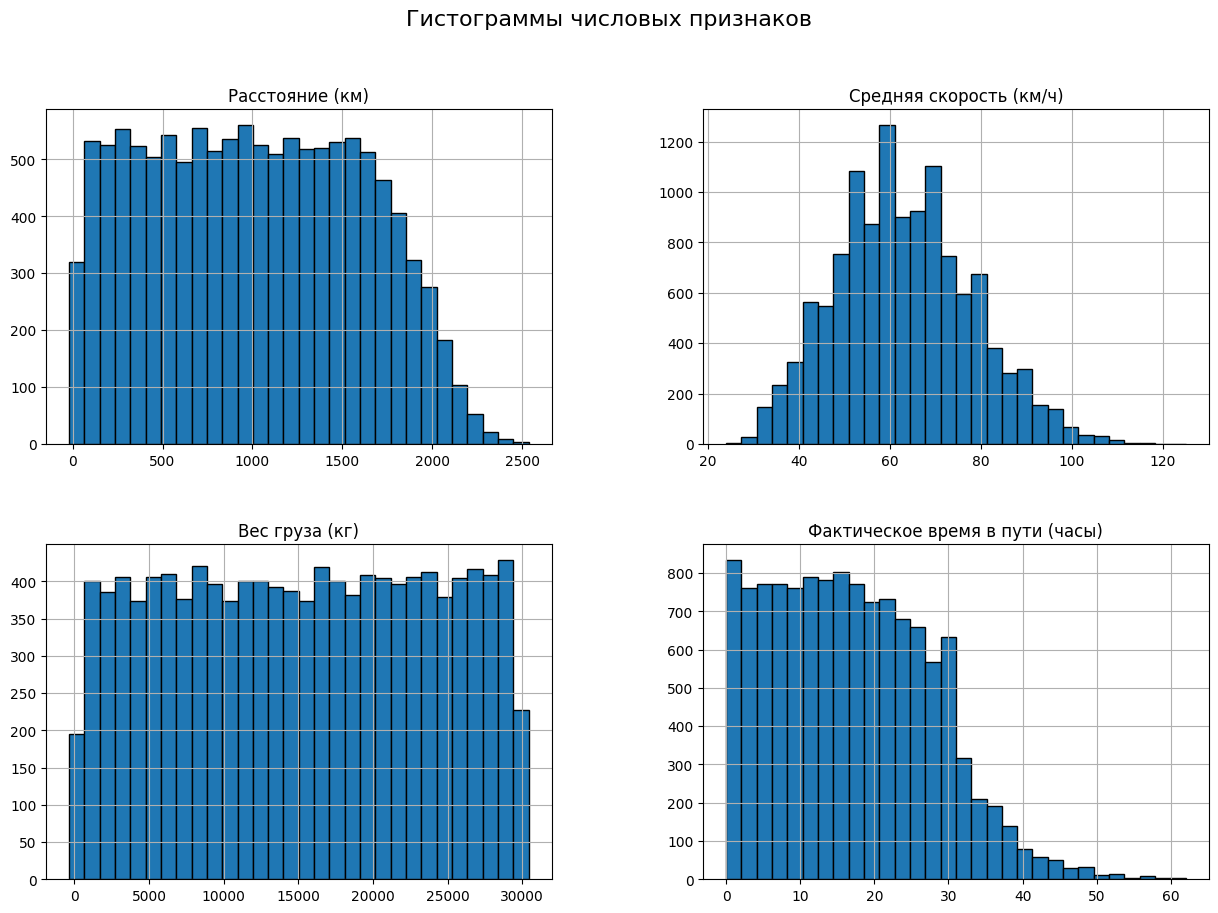

In [12]:
# Унивариантный анализ признаков

# Гистограммы для числовых признаков
if numeric_cols:
    routes_df[numeric_cols].hist(bins=30, figsize=(15,10), edgecolor='black')
    plt.suptitle('Гистограммы числовых признаков', fontsize=16)
    plt.show()

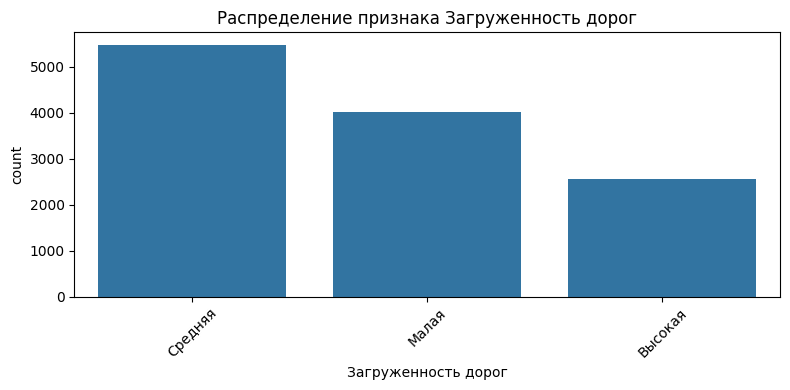

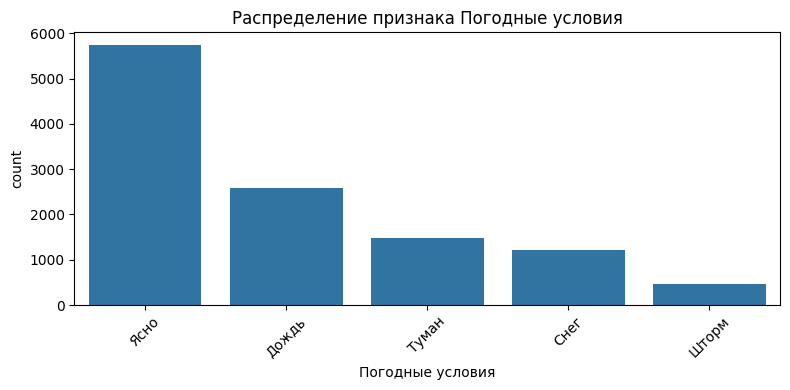

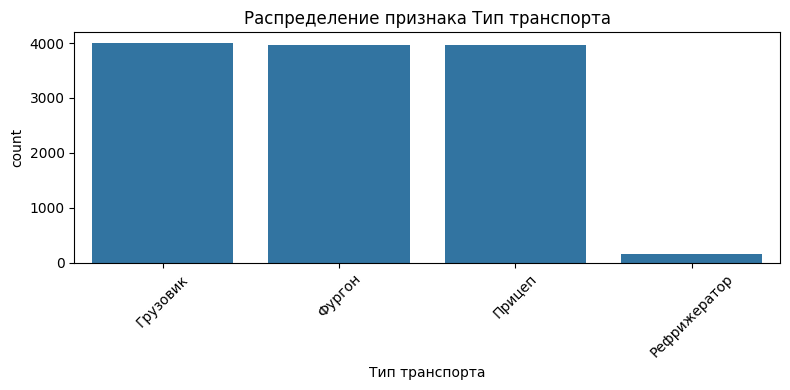

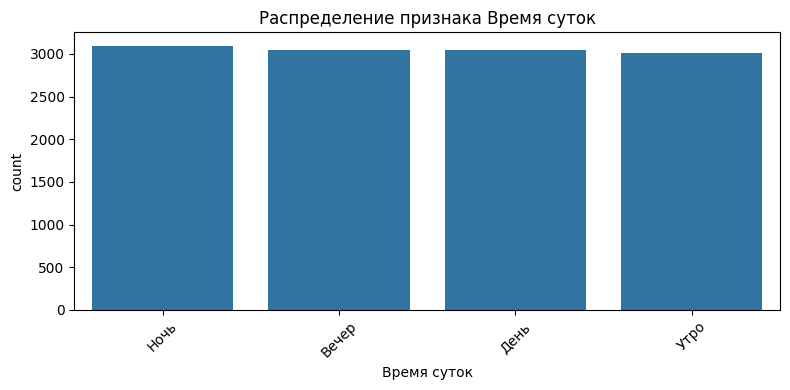

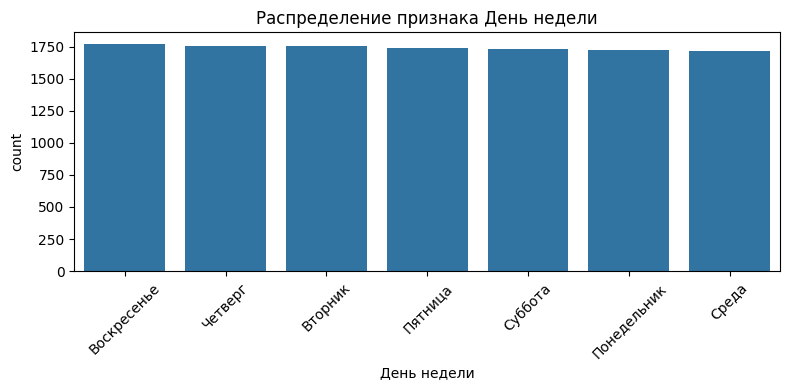

In [13]:
# Анализ распределения строковых признаков
string_cols_to_analyze = []

for col in categorical_cols:
    if not any(keyword in col.lower() for keyword in ['id', 'дата', 'date']):
        string_cols_to_analyze.append(col)

if string_cols_to_analyze:
    for col in string_cols_to_analyze:
        plt.figure(figsize=(8,4))
        sns.countplot(data=routes_df, x=col, order=routes_df[col].value_counts().index)
        plt.title(f'Распределение признака {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
else:
    print("\nВ датасете нет нормальных категориальных признаков для анализа распределения.")


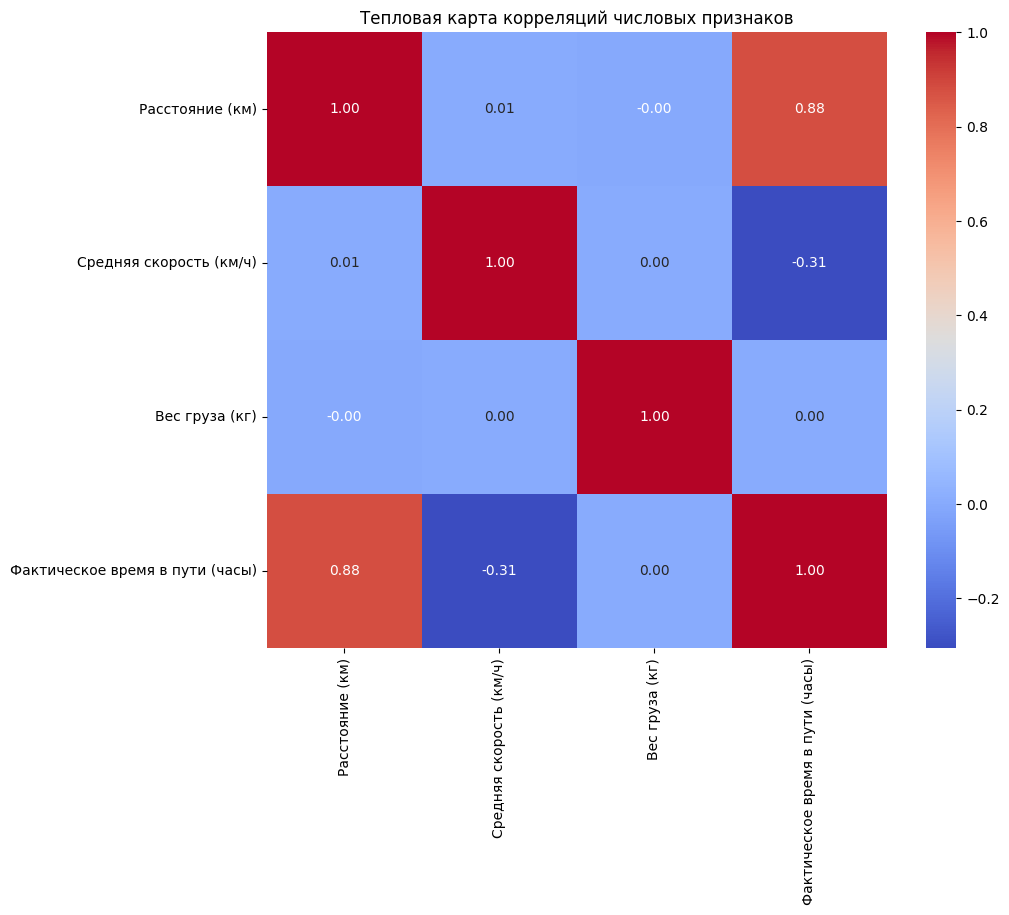

In [17]:
# Корреляция между числовыми признаками
if len(numeric_cols) > 1:
    plt.figure(figsize=(10,8))
    sns.heatmap(routes_df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Тепловая карта корреляций числовых признаков')
    plt.show()

In [28]:
real_categorical_cols = ['Загруженность дорог', 'Погодные условия', 'Тип транспорта', 'Время суток', 'День недели']

for col in real_categorical_cols:
    counts = routes_df[col].value_counts()
    total = counts.sum()
    print(f"\nРаспределение значений признака {col}:")
    for value, count in counts.items():
        percentage = (count / total) * 100
        print(f"- {value}: {count} записей ({percentage:.2f}%)")


Распределение значений признака Загруженность дорог:
- Средняя: 5480 записей (45.39%)
- Малая: 4028 записей (33.37%)
- Высокая: 2564 записей (21.24%)

Распределение значений признака Погодные условия:
- Ясно: 5737 записей (49.97%)
- Дождь: 2589 записей (22.55%)
- Туман: 1490 записей (12.98%)
- Снег: 1207 записей (10.51%)
- Шторм: 458 записей (3.99%)

Распределение значений признака Тип транспорта:
- Грузовик: 3997 записей (33.11%)
- Фургон: 3965 записей (32.84%)
- Прицеп: 3960 записей (32.80%)
- Рефрижератор: 150 записей (1.24%)

Распределение значений признака Время суток:
- Ночь: 3099 записей (25.42%)
- Вечер: 3045 записей (24.97%)
- День: 3042 записей (24.95%)
- Утро: 3007 записей (24.66%)

Распределение значений признака День недели:
- Воскресенье: 1772 записей (14.53%)
- Четверг: 1757 записей (14.41%)
- Вторник: 1754 записей (14.39%)
- Пятница: 1739 записей (14.26%)
- Суббота: 1733 записей (14.21%)
- Понедельник: 1722 записей (14.12%)
- Среда: 1716 записей (14.07%)


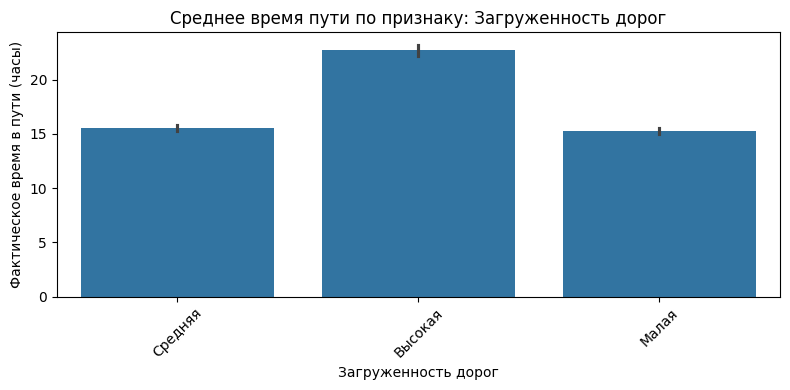

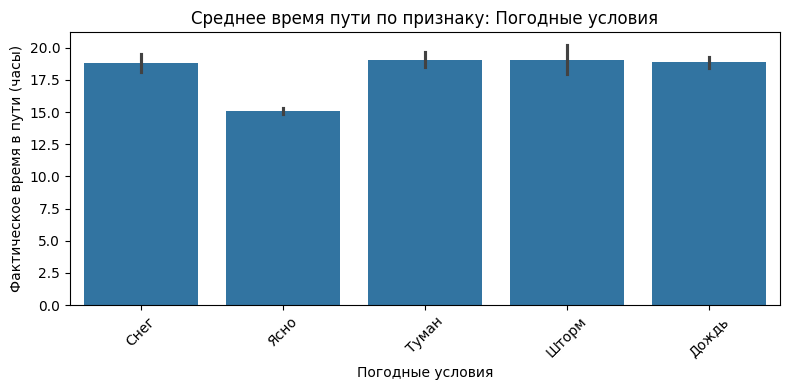

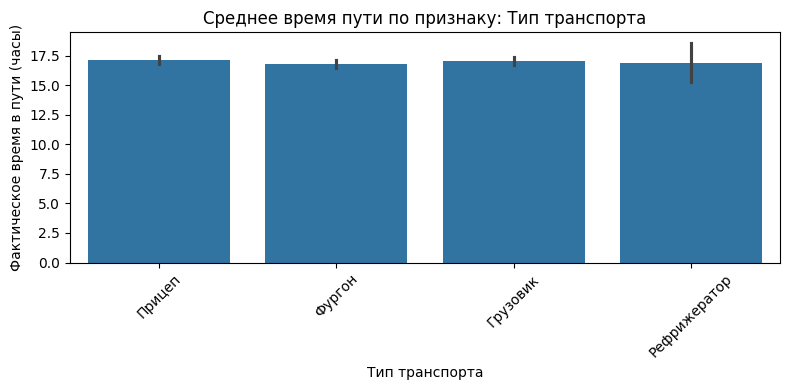

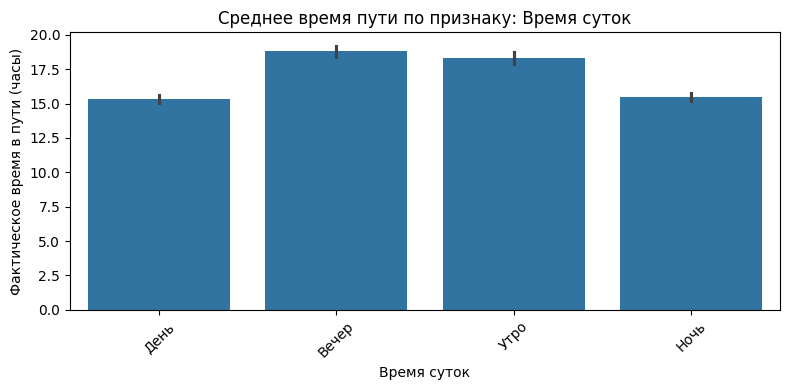

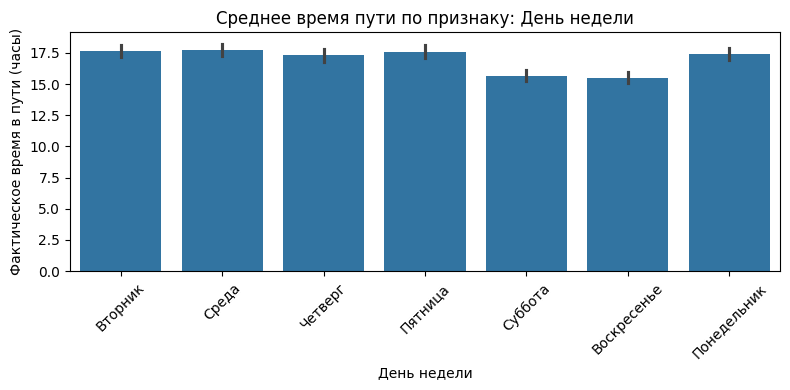

In [29]:
exclude_cols = ['ID маршрута', 'Дата отправки', 'Фактическое время в пути (часы)']

if 'Фактическое время в пути (часы)' in routes_df.columns:
    for col in categorical_cols:
        if col not in exclude_cols:
            plt.figure(figsize=(8,4))
            sns.barplot(x=col, y='Фактическое время в пути (часы)', data=routes_df, estimator=lambda x: np.mean(x))
            plt.title(f'Среднее время пути по признаку: {col}')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()


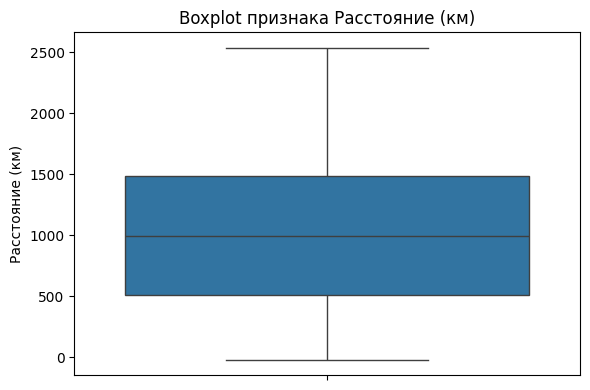

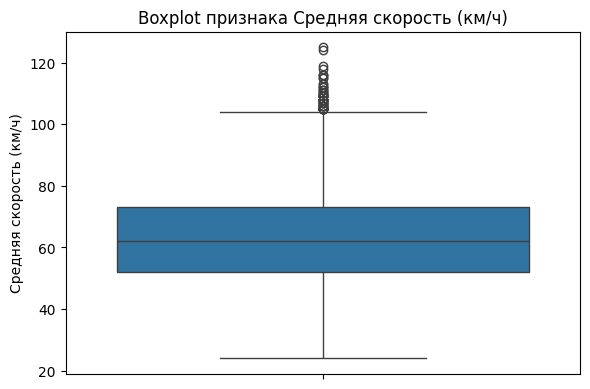

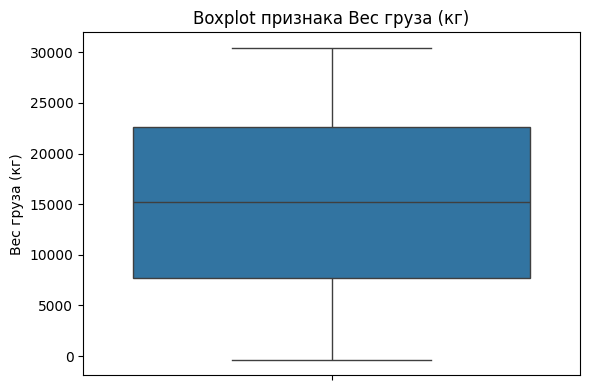

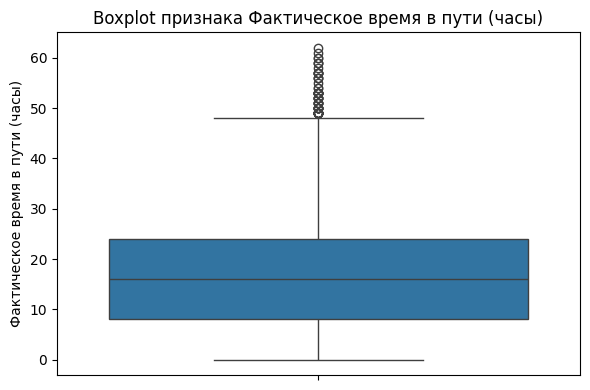

In [15]:
# Аномалии

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=routes_df, y=col)
    plt.title(f'Boxplot признака {col}')
    plt.tight_layout()
    plt.show()

In [36]:
# Выводы по анализу
print(f"- Количество строк и признаков: {routes_df.shape}")
print(f"- Найдено {duplicate_count} дубликатов.")
print("- Обнаружены пропущенные значения:")
display(missing_data[missing_data['Количество пропусков'] > 0])

if numeric_cols:
    print(f"- Числовые признаки в датасете: {numeric_cols}")
else:
    print("- Числовые признаки отсутствуют.")

if categorical_cols:
    print(f"- Обнаружены строковые признаки: {categorical_cols}")
else:
    print("- Категориальные признаки отсутствуют.")


- Количество строк и признаков: (12193, 11)
- Найдено 0 дубликатов.
- Обнаружены пропущенные значения:


,Количество пропусков,Процент пропусков
Загруженность дорог,121,0.992373
Погодные условия,712,5.839416
Тип транспорта,121,0.992373
Вес груза (кг),602,4.937259


- Числовые признаки в датасете: ['Расстояние (км)', 'Средняя скорость (км/ч)', 'Вес груза (кг)', 'Фактическое время в пути (часы)']
- Обнаружены строковые признаки: ['ID маршрута', 'Дата отправки', 'Загруженность дорог', 'Погодные условия', 'Тип транспорта', 'Время суток', 'День недели']
